In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lambao","key":"d0cc1f51ce80ac5c7bea4f308303057a"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets list -s fruits

ref                                                    title                                               size  lastUpdated          downloadCount  
-----------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
moltean/fruits                                         Fruits 360                                         760MB  2020-05-18 10:35:15          57780  
mjamilmoughal/fruits-with-colors-dataset               Fruits with colors dataset                          816B  2018-01-13 10:22:33           7236  
sriramr/fruits-fresh-and-rotten-for-classification     Fruits fresh and rotten for classification           4GB  2018-08-24 15:05:40           3602  
chrisfilo/fruit-recognition                            Fruit Recognition                                    8GB  2020-02-04 18:52:00           3296  
raghu07/vegetable-and-fruits-price-in-india            Daily Vegetable and Fruits Prices data  2010-

In [ ]:
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d moltean/fruits

kaggle.json
 99% 755M/760M [00:03<00:00, 245MB/s]
100% 760M/760M [00:03<00:00, 243MB/s]


In [ ]:
!unzip -q fruits.zip -d .

In [ ]:
import cv2
import keras
import glob
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from keras.models import load_model
from keras.datasets import cifar10
from keras.utils import np_utils
from keras import backend as K
from keras.optimizers import SGD
from keras.applications import VGG16
from keras import Model
from collections import  Counter
import seaborn as sns
import h5py

131


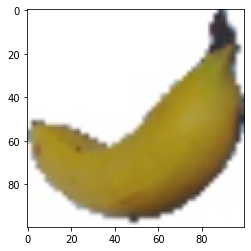

In [ ]:
fruit_name = glob.glob('/content/fruits-360/Training/*')
print(len(fruit_name))
check_img = cv2.imread("/content/fruits-360/Training/Banana/0_100.jpg")
check_img = cv2.cvtColor(check_img,cv2.COLOR_RGB2BGR)
# check_img = cv2.resize(check_img,(64,64))
plt.imshow(check_img)

In [ ]:
# Training data
training_fruits_img = []
training_label = []
fig, axs = plt.subplots(17,8, figsize=(60, 55), sharey='row')
image1 = cv2.imread("/content/fruits-360/Training/Cauliflower/75_100.jpg")
image1 = cv2.cvtColor(image1,cv2.COLOR_RGB2BGR)
a=0
axs = axs.ravel()
for fruit_name in glob.glob('/content/fruits-360/Training/*'):
  fruits_label = fruit_name.split("/")[4]
  axs[0].imshow(image1)
  axs[0].set_title(str("Cauliflower"),fontsize=40)
  a+=1
  for fuit_detail in glob.glob(os.path.join(fruit_name,"*.jpg")):
    image_fetch = cv2.imread(fuit_detail)
    image_fetch = cv2.cvtColor(image_fetch,cv2.COLOR_RGB2BGR) 
    image_fetch = cv2.resize(image_fetch,(64,64))
    training_fruits_img.append(image_fetch)
    training_label.append(fruits_label)
  axs[a].imshow(image_fetch)
  axs[a].set_title(str(fruits_label).replace("Training", ""),fontsize=40)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Test data
test_fruits_img = []
test_label = []
fig, axs = plt.subplots(17,8, figsize=(60, 55), sharey='row')
image1 = cv2.imread("/content/fruits-360/Test/Cauliflower/r2_202_100.jpg")
image1 = cv2.cvtColor(image1,cv2.COLOR_RGB2BGR)
a=0
axs = axs.ravel()
for fruit_name in glob.glob('/content/fruits-360/Test/*'):
  fruits_label = fruit_name.split("/")[4]
  axs[0].imshow(image1)
  axs[0].set_title(str("Cauliflower"),fontsize=40)
  a+=1
  for fuit_detail in glob.glob(os.path.join(fruit_name,"*.jpg")):
    image_fetch = cv2.imread(fuit_detail)
    image_fetch = cv2.cvtColor(image_fetch,cv2.COLOR_RGB2BGR) 
    image_fetch = cv2.resize(image_fetch,(64,64))
    test_fruits_img.append(image_fetch)
    test_label.append(fruits_label)
  axs[a].imshow(image_fetch)
  axs[a].set_title(str(fruits_label).replace("Test", ""),fontsize=40)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# convert to array & normalization
x_train =  np.array(training_fruits_img)
y_train =  np.array(training_label)
x_test = np.array(test_fruits_img)
y_test = np.array(test_label)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
# release memory
del(training_fruits_img)
del(training_label)
del(test_fruits_img)
del(test_label)

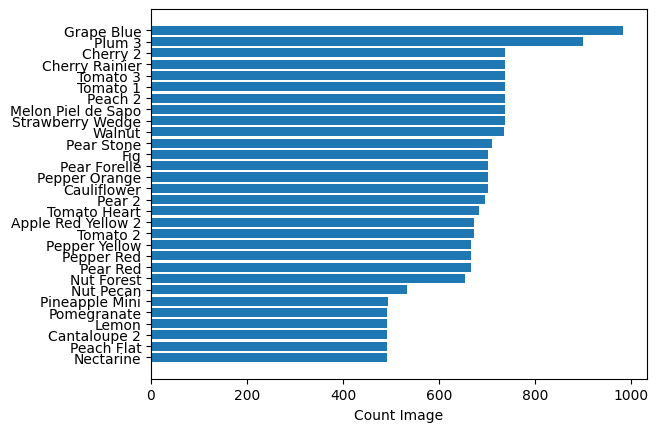

<Figure size 5000x5000 with 0 Axes>

In [ ]:
Counter(y_train)
y_train_df = pd.DataFrame(y_train,columns=['label'])
y_train_df1 = y_train_df['label'].value_counts().reset_index(name='count')
y_train_df1_ = y_train_df1.sort_values(by=['count'],ascending=False).head(30)
y_pos = np.arange(len(y_train_df1_['index']))
plt.rcdefaults()

figure, ax = plt.subplots()
plt.figure(figsize=(50,50))
ax.barh(y_pos, y_train_df1_['count'], align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_train_df1_['index'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count Image')

plt.show()
# 

In [ ]:
imbalance_df = y_train_df1_[y_train_df1_['count']>=534]
imbalance_list = list_of_imbalance['index'].to_list()
imbalance_list

['Grape Blue',
 'Plum 3',
 'Cherry 2',
 'Cherry Rainier',
 'Tomato 3',
 'Tomato 1',
 'Peach 2',
 'Melon Piel de Sapo',
 'Strawberry Wedge',
 'Walnut',
 'Pear Stone',
 'Fig',
 'Pear Forelle',
 'Pepper Orange',
 'Cauliflower',
 'Pear 2',
 'Tomato Heart',
 'Apple Red Yellow 2',
 'Tomato 2',
 'Pepper Yellow',
 'Pepper Red',
 'Pear Red',
 'Nut Forest',
 'Nut Pecan']

In [ ]:
# Training data
training_fruits_img = []
training_label = []
fig, axs = plt.subplots(17,8, figsize=(60, 55), sharey='row')
image1 = cv2.imread("/content/fruits-360/Training/Cauliflower/75_100.jpg")
image1 = cv2.cvtColor(image1,cv2.COLOR_RGB2BGR)
a=0
axs = axs.ravel()
for fruit_name in glob.glob('/content/fruits-360/Training/*'):
  fruits_label = fruit_name.split("/")[4]
  axs[0].imshow(image1)
  axs[0].set_title(str("Cauliflower"),fontsize=40)
  a+=1
  for n,fuit_detail in enumerate(glob.glob(os.path.join(fruit_name,"*.jpg"))):
    if (fruits_label in imbalance_list and n>500):
      continue
    else:
        image_fetch = cv2.imread(fuit_detail)
        image_fetch = cv2.cvtColor(image_fetch,cv2.COLOR_RGB2BGR) 
        image_fetch = cv2.resize(image_fetch,(64,64))
        training_fruits_img.append(image_fetch)
        training_label.append(fruits_label)
  axs[a].imshow(image_fetch)
  axs[a].set_title(str(fruits_label).replace("Training", ""),fontsize=40)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# convert to array & normalization
x_train =  np.array(training_fruits_img)
y_train =  np.array(training_label)

x_train = x_train.astype('float32')
x_train /= 255
del(training_fruits_img)
del(training_label)

In [ ]:
#label encoding for label
label_to_enc = {v:k for k,v in enumerate(np.unique(y_train)) }
y_train_enc = np.array([label_to_enc[i] for i in y_train])
y_test_enc = np.array([label_to_enc[i] for i in y_test])
label_to_enc

{'Apple Braeburn': 0,
 'Apple Crimson Snow': 1,
 'Apple Golden 1': 2,
 'Apple Golden 2': 3,
 'Apple Golden 3': 4,
 'Apple Granny Smith': 5,
 'Apple Pink Lady': 6,
 'Apple Red 1': 7,
 'Apple Red 2': 8,
 'Apple Red 3': 9,
 'Apple Red Delicious': 10,
 'Apple Red Yellow 1': 11,
 'Apple Red Yellow 2': 12,
 'Apricot': 13,
 'Avocado': 14,
 'Avocado ripe': 15,
 'Banana': 16,
 'Banana Lady Finger': 17,
 'Banana Red': 18,
 'Beetroot': 19,
 'Blueberry': 20,
 'Cactus fruit': 21,
 'Cantaloupe 1': 22,
 'Cantaloupe 2': 23,
 'Carambula': 24,
 'Cauliflower': 25,
 'Cherry 1': 26,
 'Cherry 2': 27,
 'Cherry Rainier': 28,
 'Cherry Wax Black': 29,
 'Cherry Wax Red': 30,
 'Cherry Wax Yellow': 31,
 'Chestnut': 32,
 'Clementine': 33,
 'Cocos': 34,
 'Corn': 35,
 'Corn Husk': 36,
 'Cucumber Ripe': 37,
 'Cucumber Ripe 2': 38,
 'Dates': 39,
 'Eggplant': 40,
 'Fig': 41,
 'Ginger Root': 42,
 'Granadilla': 43,
 'Grape Blue': 44,
 'Grape Pink': 45,
 'Grape White': 46,
 'Grape White 2': 47,
 'Grape White 3': 48,
 'Grap

In [ ]:
y_train_ = np_utils.to_categorical(y_train_enc,131)
y_test_ = np_utils.to_categorical(y_test_enc,131)
print(len(y_train_))
print(len(y_test_))

62502
22688


In [ ]:
############  builld, compilling model
num_class=len(list(set(y_train)))
batch =32
epochs = 50
lr = 0.01

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",padding='same',input_shape=x_train.shape[1:]))
model.add(Conv2D(32,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation="relu"))
model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_class,activation="softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer = SGD(lr),
              metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 31, 31, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)       

In [ ]:
############  train model
history = model.fit(x_train,y_train_,
          batch_size=batch,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test,y_test_))
score = model.evaluate(x_test,y_test_,verbose=0) 

# SAVE MODEL
model.save('fruit_classifier_cnn_' + str(epochs) + 'epochs.h5')

Epoch 1/50
1954/1954 [==============================] - 24s 12ms/step - loss: 4.2640 - accuracy: 0.0812 - val_loss: 1.6165 - val_accuracy: 0.5482
Epoch 2/50
1954/1954 [==============================] - 23s 12ms/step - loss: 1.0095 - accuracy: 0.6987 - val_loss: 0.8896 - val_accuracy: 0.7724
Epoch 3/50
1954/1954 [==============================] - 23s 12ms/step - loss: 0.3034 - accuracy: 0.9028 - val_loss: 0.3867 - val_accuracy: 0.8992
Epoch 4/50
1954/1954 [==============================] - 23s 12ms/step - loss: 0.1486 - accuracy: 0.9525 - val_loss: 1.1251 - val_accuracy: 0.7528
Epoch 5/50
1954/1954 [==============================] - 23s 12ms/step - loss: 0.1173 - accuracy: 0.9627 - val_loss: 0.2725 - val_accuracy: 0.9416
Epoch 6/50
1954/1954 [==============================] - 23s 12ms/step - loss: 0.0647 - accuracy: 0.9784 - val_loss: 0.2618 - val_accuracy: 0.9530
Epoch 7/50
1954/1954 [==============================] - 23s 12ms/step - loss: 0.0496 - accuracy: 0.9838 - val_loss: 0.2403 -

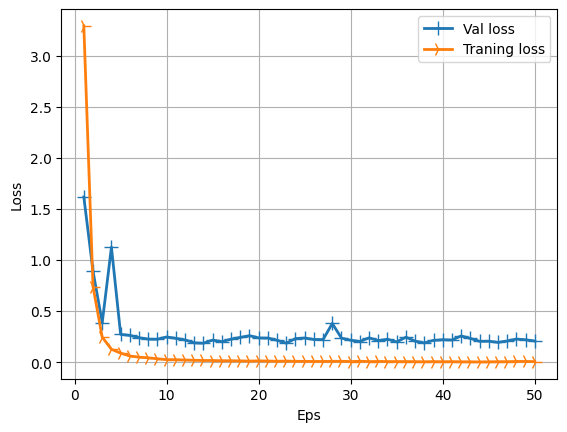

In [ ]:
# TRAING/ VALIDATION LOSS
history_dict = history.history
train_loss_val = history_dict['loss']
val_loss_val = history_dict['val_loss']
epoch = range(1, len(val_loss_val)+1)

line1 = plt.plot(epoch, val_loss_val, label='Val loss')
line2 = plt.plot(epoch, train_loss_val, label='Traning loss')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Eps')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
pred= model.predict(x_test)
y_pred=np.zeros(22688)
for i in range(22688):
    y_pred[i]=np.argmax(pred[i])
print(y_pred)
y_pred.shape

[67. 67. 67. ... 97. 97. 97.]


(22688,)

In [ ]:
y_pred[20000]

98.0

In [ ]:
y_test_enc[20000]

98

In [ ]:
# CLASSIFICATION REPORT
cnn_report = metrics.classification_report(y_test_enc,y_pred)
print(cnn_report)

              precision    recall  f1-score   support

           0       1.00      0.74      0.85       164
           1       1.00      1.00      1.00       148
           2       0.99      1.00      1.00       160
           3       1.00      1.00      1.00       164
           4       0.67      1.00      0.80       161
           5       1.00      0.76      0.86       164
           6       1.00      1.00      1.00       152
           7       0.89      0.98      0.93       164
           8       0.89      0.98      0.94       164
           9       0.97      1.00      0.99       144
          10       0.97      1.00      0.99       166
          11       0.97      0.90      0.93       164
          12       1.00      1.00      1.00       219
          13       1.00      1.00      1.00       164
          14       1.00      0.99      0.99       143
          15       0.99      1.00      1.00       166
          16       1.00      0.75      0.86       166
          17       0.85    

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Label: Corn
Classifier predicted: Quince


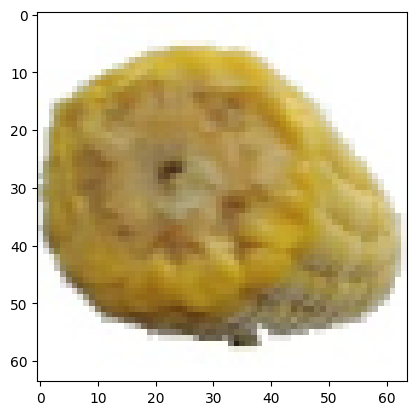

In [ ]:
#  DETECTOR & TEST
label_dict = {a:z for z,a in label_to_enc.items()}
def classifier(input_img,model):
  x_img = []
  img = cv2.imread(input_img)
  img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
  img = cv2.resize(img,(64,64))
  x_img.append(img)
  x_img =  np.array(x_img)
  x_img = x_img.astype('float32')
  x_img /=255
  model_util = load_model(model)
  result = model_util.predict_classes(x_img)
  predict_label = label_dict[result[0]]
  plt.imshow(img)
  print("Label: " + input_img.split("/")[4])
  print("Classifier predicted: " + predict_label)

input_img = "/content/fruits-360/Test/Corn/r2_72_100.jpg"
input_model = "fruit_classifier_cnn_50epochs.h5"
classifier(input_img,input_model)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Label: Mango
Classifier predicted: Mango


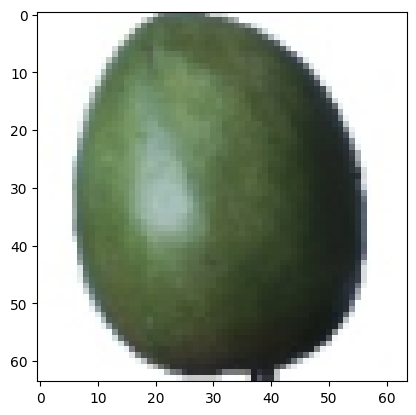

In [ ]:
input_img = "/content/fruits-360/Test/Mango/2_100.jpg"
classifier(input_img,input_model)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Label: watermelon_test.jpg
Classifier predicted: Pear 2


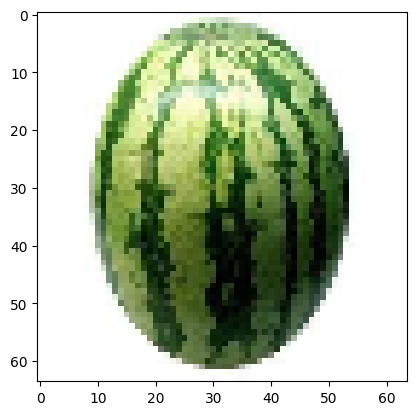

In [ ]:
#  DETECTOR & TEST ON EXTERNAL IMAGE FOR SELF-BUILD MODEL
label_dict = {a:z for z,a in label_to_enc.items()}
def classifier(input_img,model):
  x_img = []
  img = cv2.imread(input_img)
  img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
  img = cv2.resize(img,(64,64))
  # x_img.append(img)
  x_img =  np.array([img])
  x_img = x_img.astype('float32')
  x_img /=255
  model_util = load_model(model)
  result = model_util.predict_classes(x_img)
  predict_label = label_dict[result[0]]
  plt.imshow(img)
  print("Label: " + input_img.split("/")[2])
  print("Classifier predicted: " + predict_label)

input_img = "/content/watermelon_test.jpg"
input_model = "fruit_classifier_cnn_50epochs.h5"
classifier(input_img,input_model)

#### TRANSFER LEARNING ON VGG16

In [ ]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=x_train.shape[1:])
for i,lay in enumerate(vgg16.layers):
  print(str(i)+" "+lay.__class__.__name__, lay.trainable)

0 InputLayer True
1 Conv2D True
2 Conv2D True
3 MaxPooling2D True
4 Conv2D True
5 Conv2D True
6 MaxPooling2D True
7 Conv2D True
8 Conv2D True
9 Conv2D True
10 MaxPooling2D True
11 Conv2D True
12 Conv2D True
13 Conv2D True
14 MaxPooling2D True
15 Conv2D True
16 Conv2D True
17 Conv2D True
18 MaxPooling2D True


In [ ]:
# freeze all layer except FC
for lay in vgg16.layers:
  lay.trainable=False

In [ ]:
# add FC until
def addtopmodel(base_model,num_classes):
  top_model = base_model.output
  top_model = Flatten(name='flatten')(top_model)
  top_model = Dense(512)(top_model)
  top_model = Dropout(0.3)(top_model)
  top_model = Dense(256)(top_model)
  top_model = Dropout(0.3)(top_model)
  top_model = Dense(num_classes,activation='softmax')(top_model)
  return top_model

In [ ]:
# compile transfer model
fc = addtopmodel(vgg16,num_class)
vgg_trf_model = Model(inputs=vgg16.input, outputs=fc)
print(vgg_trf_model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0   

In [ ]:
# compile model
batch =32
epochs = 100
lr = 0.001

checkpoint = ModelCheckpoint("fruit_classifier_vgg16.h5",
                             monitor='val_loss',
                             model='min',
                             verbose=1,
                             save_best_only=True)

early_stop = EarlyStopping(monitor='val_loss',
                           min_delta=0,
                           patience=10,verbose=1,
                           restore_best_weights=True)
callback = [early_stop,checkpoint]

opt = keras.optimizers.SGD(learning_rate=lr,momentum=0.9)

vgg_trf_model.compile(loss='categorical_crossentropy',
              optimizer = opt,
              metrics = ['accuracy'])

In [ ]:
############  train model
history = vgg_trf_model.fit(x_train,y_train_,
          batch_size=batch,
          epochs=epochs,
          verbose=1,
          callbacks=callback,
          validation_data=(x_test,y_test_)) 
score = vgg_trf_model.evaluate(x_test,y_test_,verbose=0) 

vgg_trf_model.save('fruit_classifier_vgg16_' + str(epochs) + 'epochs.h5')

Epoch 1/100
1954/1954 [==============================] - 42s 21ms/step - loss: 3.0530 - accuracy: 0.3299 - val_loss: 0.9256 - val_accuracy: 0.7830

Epoch 00001: val_loss improved from inf to 0.92560, saving model to fruit_classifier_vgg16.h5
Epoch 2/100
1954/1954 [==============================] - 42s 21ms/step - loss: 0.6090 - accuracy: 0.8382 - val_loss: 0.5866 - val_accuracy: 0.8447

Epoch 00002: val_loss improved from 0.92560 to 0.58664, saving model to fruit_classifier_vgg16.h5
Epoch 3/100
1954/1954 [==============================] - 42s 21ms/step - loss: 0.3129 - accuracy: 0.9169 - val_loss: 0.4238 - val_accuracy: 0.8886

Epoch 00003: val_loss improved from 0.58664 to 0.42383, saving model to fruit_classifier_vgg16.h5
Epoch 4/100
1954/1954 [==============================] - 42s 21ms/step - loss: 0.2053 - accuracy: 0.9472 - val_loss: 0.3725 - val_accuracy: 0.9040

Epoch 00004: val_loss improved from 0.42383 to 0.37254, saving model to fruit_classifier_vgg16.h5
Epoch 5/100
1954/195

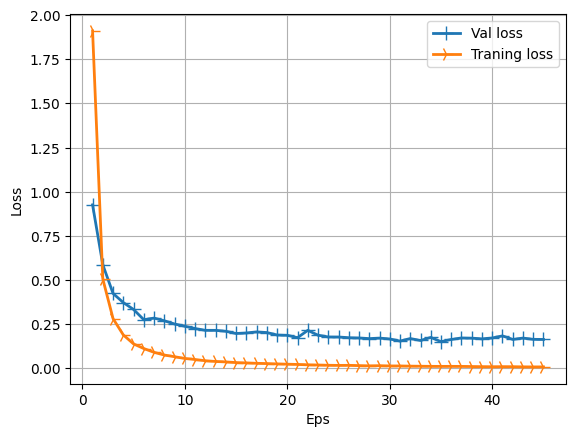

In [ ]:
# TRAING/ VALIDATION LOSS FOR TRANSFER VGG16
history_dict = history.history
train_loss_val = history_dict['loss']
val_loss_val = history_dict['val_loss']
epoch = range(1, len(val_loss_val)+1)

line1 = plt.plot(epoch, val_loss_val, label='Val loss')
line2 = plt.plot(epoch, train_loss_val, label='Traning loss')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Eps')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [201]:
model_util = load_model("fruit_classifier_vgg16_100epochs.h5")
pred= model_util.predict(x_test)
y_pred=np.zeros(22688)
for i in range(22688):
    y_pred[i]=np.argmax(pred[i])
print(y_pred)
y_pred.shape

[67. 67. 67. ... 97. 97. 97.]


(22688,)

In [202]:
vgg_report = metrics.classification_report(y_test_enc,y_pred)
print(vgg_report)

              precision    recall  f1-score   support

           0       0.77      0.98      0.86       164
           1       0.89      0.85      0.87       148
           2       0.99      0.91      0.95       160
           3       1.00      0.99      1.00       164
           4       0.79      1.00      0.88       161
           5       0.96      0.82      0.89       164
           6       0.87      1.00      0.93       152
           7       0.89      0.96      0.92       164
           8       0.98      0.99      0.99       164
           9       0.96      0.97      0.96       144
          10       0.95      1.00      0.98       166
          11       0.95      1.00      0.97       164
          12       0.98      1.00      0.99       219
          13       0.96      0.99      0.98       164
          14       0.86      1.00      0.92       143
          15       0.99      0.99      0.99       166
          16       0.94      0.98      0.96       166
          17       0.95    

Label: Corn
Classifier predicted: Corn


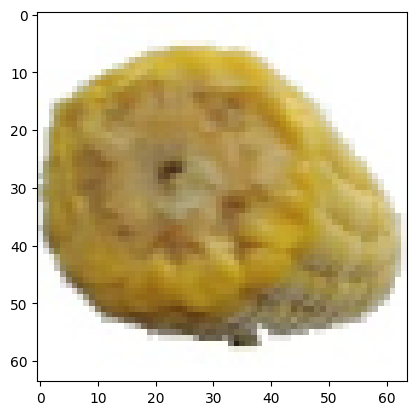

In [190]:
#  DETECTOR & TEST
label_dict = {a:z for z,a in label_to_enc.items()}
def classifier_vgg(input_img,model):
  x_img = []
  img = cv2.imread(input_img)
  img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
  img = cv2.resize(img,(64,64))
  x_img.append(img)
  x_img =  np.array(x_img)
  x_img = x_img.astype('float32')
  x_img /=255
  model_util = load_model(model)
  result = model_util.predict(x_img)
  y_classes = result.argmax(axis=-1)
  predict_label = label_dict[y_classes[0]]
  plt.imshow(img)
  print("Label: " + input_img.split("/")[4])
  print("Classifier predicted: " + predict_label)

#input_model = "fruit_classifier_cnn_50epochs.h5"
input_img = "/content/fruits-360/Test/Corn/r2_72_100.jpg"
input_model = "fruit_classifier_vgg16_100epochs.h5"
classifier_vgg(input_img,input_model)

Label: watermelon_test.jpg
Classifier predicted: Watermelon


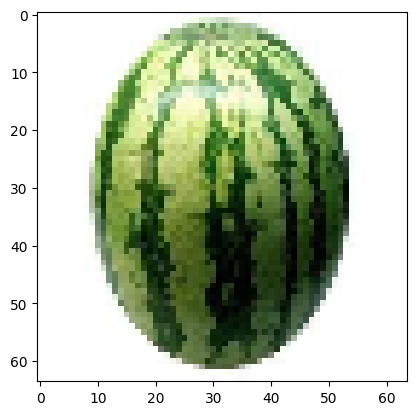

In [192]:
#  DETECTOR & TEST ON EXTERNAL IMAGE
label_dict = {a:z for z,a in label_to_enc.items()}
def classifier_vgg(input_img,model):
  x_img = []
  img = cv2.imread(input_img)
  img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
  img = cv2.resize(img,(64,64))
  x_img.append(img)
  x_img =  np.array(x_img)
  x_img = x_img.astype('float32')
  x_img /=255
  model_util = load_model(model)
  result = model_util.predict(x_img)
  y_classes = result.argmax(axis=-1)
  predict_label = label_dict[y_classes[0]]
  plt.imshow(img)
  print("Label: " + input_img.split("/")[2])
  print("Classifier predicted: " + predict_label)

#input_model = "fruit_classifier_cnn_50epochs.h5"
input_img = "/content/watermelon_test.jpg"
input_model = "fruit_classifier_vgg16_100epochs.h5"
classifier_vgg(input_img,input_model)

Label: banana_test.jpg
Classifier predicted: Banana


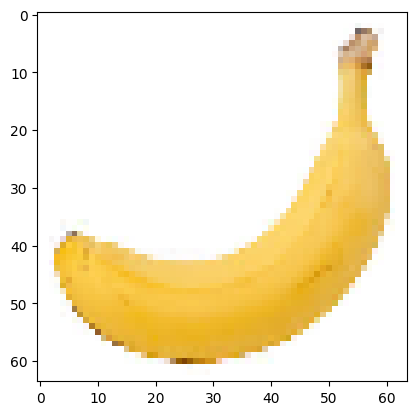

In [194]:
input_img = "/content/banana_test.jpg"
classifier_vgg(input_img,input_model)

Label: corn_test.jpg
Classifier predicted: Corn


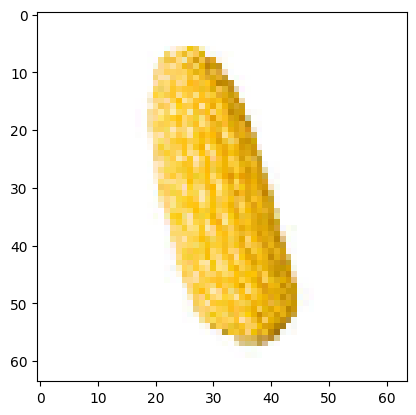

In [200]:
input_img = "/content/corn_test.jpg"
classifier_vgg(input_img,input_model)

Label: cherry2_test.jpg
Classifier predicted: Cherry 2


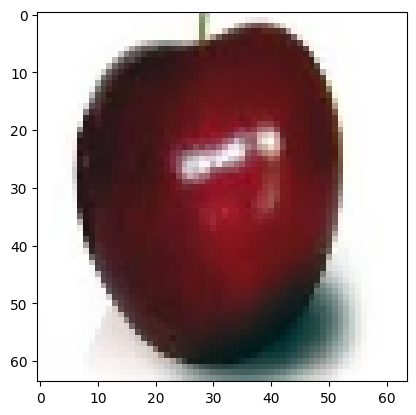

In [213]:
input_img = "/content/cherry2_test.jpg"
classifier_vgg(input_img,input_model)